In [23]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from PIL import Image

In [2]:
pathToSave = 'RAPzs/'
pathToTestingMetricF1 = pathToSave+'/testing_dict_instance_f1.json'
pathToTestingDataGTPredicted = pathToSave+'/testing_dict_gt_predicted.json'

pathOfDataset = '/mnt/rhome/paa/pedestrian/Rethinking_of_PAR/data/RAP2/RAP_dataset/'
typeImage = '.png'

pathToTrainingMetricF1 = pathToSave+'/training_dict_instance_f1.json'
pathToTrainingDataGTPredicted = pathToSave+'/training_dict_gt_predicted.json'

listAttributesRAPv2 = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60','Female','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']
listAttributesRAPzs = listAttributesRAPv2

listAttributesRAPzs.remove('Age46-60')

columnsDF = ['value F1', 'nameImg']
columnsDF.extend(listAttributesRAPzs)

fileTestingGTPredicted = open(pathToTestingDataGTPredicted)
jsonTestingGTPredicted = json.load(fileTestingGTPredicted)

fileTrainingGTPredicted = open(pathToTrainingDataGTPredicted)
jsonTrainingGTPredicted = json.load(fileTrainingGTPredicted)

fileTestingInstance = open(pathToTestingMetricF1)
jsonTestingInstance = json.load(fileTestingInstance)

fileTrainingInstance = open(pathToTrainingMetricF1)
jsonTrainingInstance = json.load(fileTrainingInstance)

In [48]:
attributeToAnalyze='hs-BaldHead'
maxImages=20

In [49]:
listAttributes=listAttributesRAPzs

In [50]:
indexOFAttribute = listAttributesRAPzs.index(attributeToAnalyze)
columnsDFGT = [item + ' gt' for item in listAttributes]
columnsDFPred= [item + ' pred' for item in listAttributes]
columnsDF = columnsDFGT + columnsDFPred


valuesGTTesting = jsonTestingGTPredicted['testing gt']
allImages = jsonTestingInstance['img name testing']
nameImages = [image for images in allImages for image in images]


valuesPredictedTestingOld = jsonTestingGTPredicted['testing predicted']

dictTestingGTPredicted = dict.fromkeys(columnsDF)
dictTestingGTPredicted['name image'] = nameImages
for column in columnsDFGT:
    dictTestingGTPredicted[column] = [int(vector[columnsDFGT.index(column)]) for vector in valuesGTTesting]

for column in columnsDFPred:
    dictTestingGTPredicted[column] = [int(vector[columnsDFPred.index(column)]) for vector in valuesPredictedTestingOld]

dfTestingRAPzsIdentitites = pd.DataFrame.from_dict(dictTestingGTPredicted)


datasetWithAttribute = dfTestingRAPzsIdentitites[(dfTestingRAPzsIdentitites[attributeToAnalyze+' gt']==1)]
gtWithAttribute = datasetWithAttribute[columnsDFGT].to_numpy()


dfTestingRAPzsIdentitesPerformanceNameImage = pd.DataFrame()
dfTestingRAPzsIdentitesPerformanceNameImage['name image'] = datasetWithAttribute['name image']


In [51]:
indexOFAttribute = listAttributesRAPzs.index(attributeToAnalyze)
columnsDFGT = [item + ' gt' for item in listAttributes]
columnsDFPred= [item + ' pred' for item in listAttributes]
columnsDF = columnsDFGT + columnsDFPred

valuesGTTraining = jsonTrainingGTPredicted['training gt']
valuesPredictedTrainingOld = jsonTrainingGTPredicted['training predicted']
allImages = jsonTrainingInstance['img name training']
nameImages = [image for images in allImages for image in images]

dictTrainingGTPredicted = dict.fromkeys(columnsDF)
dictTrainingGTPredicted['name image'] = nameImages
for column in columnsDFGT:
    dictTrainingGTPredicted[column] = [int(vector[columnsDFGT.index(column)]) for vector in valuesGTTraining]

for column in columnsDFPred:
    dictTrainingGTPredicted[column] = [int(vector[columnsDFPred.index(column)]) for vector in valuesPredictedTrainingOld]

dfTrainingRAPzsIdentitites = pd.DataFrame.from_dict(dictTrainingGTPredicted)

datasetWithAttribute = dfTrainingRAPzsIdentitites[(dfTrainingRAPzsIdentitites[attributeToAnalyze+' gt']==1)]


dfTrainingRAPzsIdentitesPerformanceNameImage = pd.DataFrame()
dfTrainingRAPzsIdentitesPerformanceNameImage['name image'] = datasetWithAttribute['name image']



In [52]:
listImagesWithAttributeTraining = list(dfTrainingRAPzsIdentitesPerformanceNameImage['name image'][:maxImages])
listImagesWithAttributeTesting = list(dfTestingRAPzsIdentitesPerformanceNameImage['name image'][:maxImages])

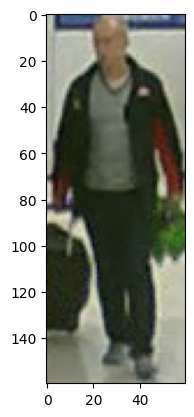

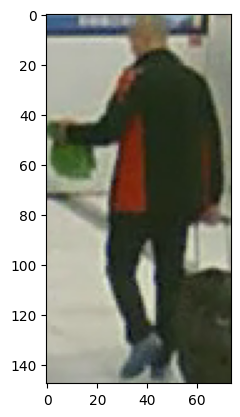

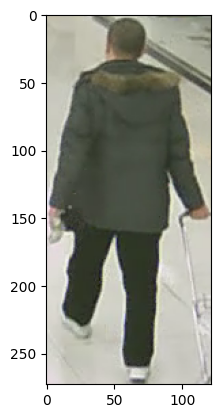

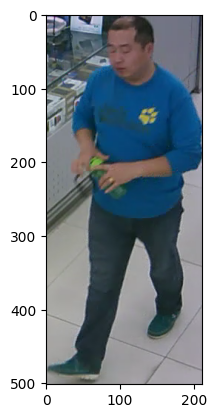

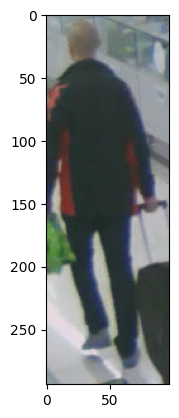

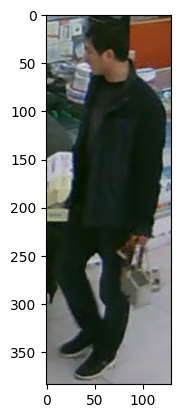

In [53]:
for image in listImagesWithAttributeTesting:
    img = np.asarray(Image.open(pathOfDataset+image))
    plt.figure()
    plt.imshow(img)

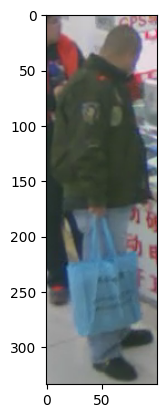

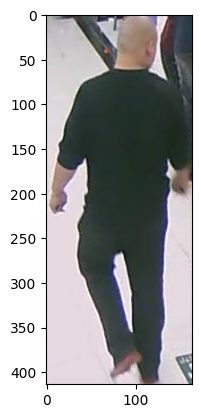

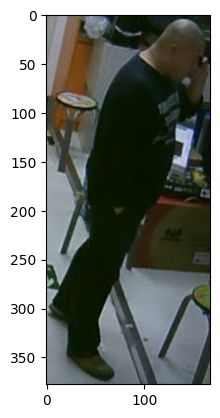

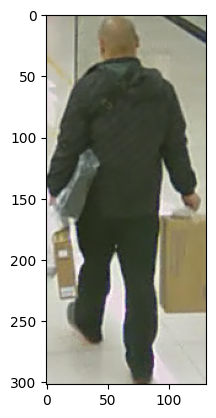

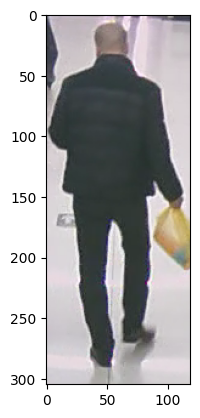

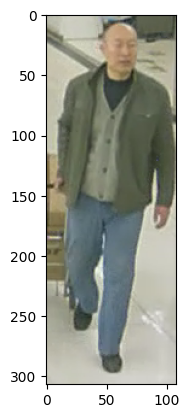

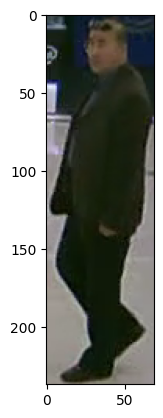

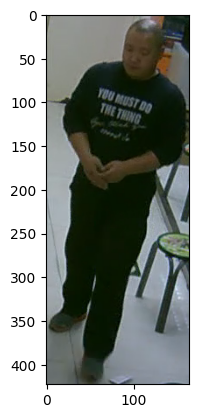

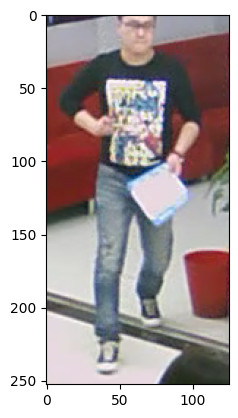

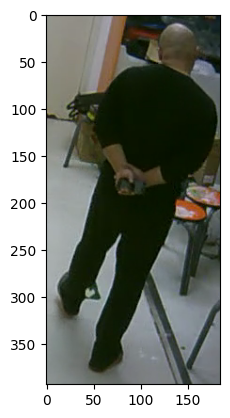

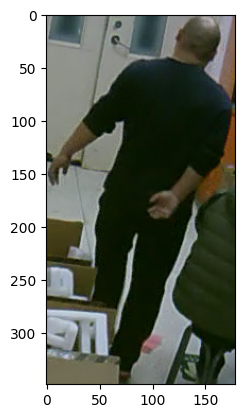

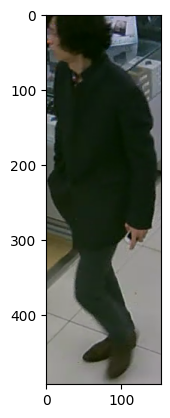

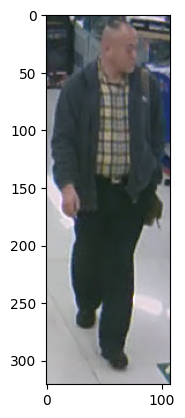

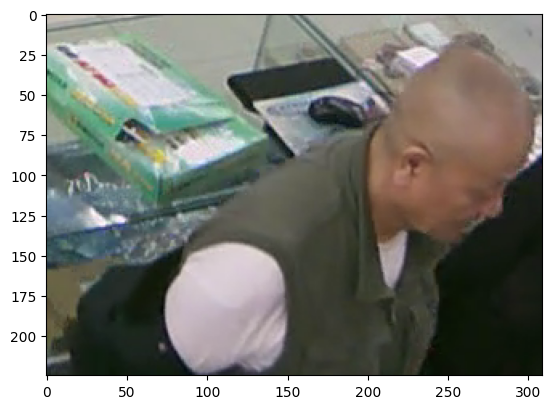

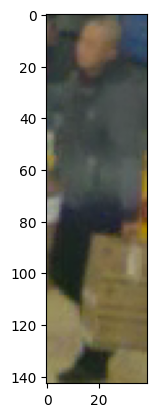

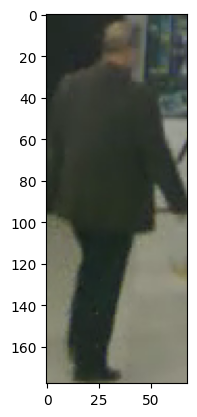

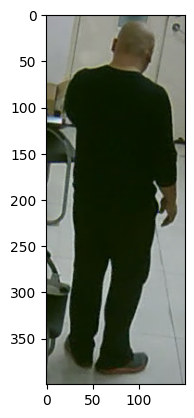

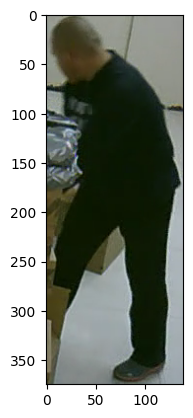

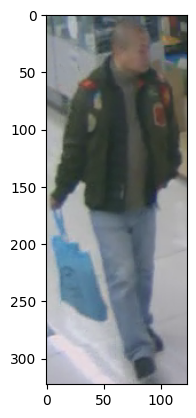

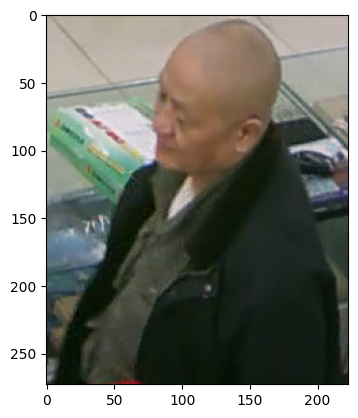

In [54]:
for image in listImagesWithAttributeTraining:
    img = np.asarray(Image.open(pathOfDataset+image))
    plt.figure()
    plt.imshow(img)